<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* RandomizedSearchCV
* Customer Analysis

In [131]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, time, date, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error, confusion_matrix
import sklearn.datasets as skd

# Customer Analysis

In [7]:
os.chdir('./sample_data')

In [8]:
os.listdir()

['anscombe.json',
 'README.md',
 'mnist_test.csv',
 'mnist_train_small.csv',
 'california_housing_test.csv',
 'california_housing_train.csv']

In [9]:
import json

In [12]:
with open('anscombe.json', 'r') as f :
  raw = json.load(f)
pd.DataFrame(raw).head()

,Series,X,Y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [17]:
os.chdir('..')
os.listdir()

['.config',
 'retail_data_transactions.csv',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ecommerce-data.csv',
 'retail_data_response.csv',
 'sample_data']

In [18]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [20]:
df.columns = df.iloc[0]

In [21]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [29]:
df.drop([0], axis = 0, inplace = True)

In [30]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [32]:
df = df[df['order_status'] == 'Approved']
df.transaction_date = pd.to_datetime(df.transaction_date)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [35]:
df['month'] = df.transaction_date.to_numpy().astype('datetime64[M]')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,month
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05-01
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10-01
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145,2017-08-01
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226,2017-10-01


In [37]:
df = df[['customer_id', 'transaction_date', 'month']]
df.head()

,customer_id,transaction_date,month
1,2950,2017-02-25,2017-02-01
2,3120,2017-05-21,2017-05-01
3,402,2017-10-16,2017-10-01
4,3135,2017-08-31,2017-08-01
5,787,2017-10-01,2017-10-01


In [39]:
df = df.sort_values(['customer_id', 'transaction_date'])
df.head()

,customer_id,transaction_date,month
9785,1,2017-01-05,2017-01-01
13424,1,2017-02-21,2017-02-01
14486,1,2017-03-27,2017-03-01
18970,1,2017-03-29,2017-03-01
3765,1,2017-04-06,2017-04-01


In [47]:
list_pu = df.groupby(['customer_id', 'month']).first().reset_index()
list_pu.head()

,customer_id,month,transaction_date
0,1,2017-01-01,2017-01-05
1,1,2017-02-01,2017-02-21
2,1,2017-03-01,2017-03-27
3,1,2017-04-01,2017-04-06
4,1,2017-05-01,2017-05-11


In [49]:
list_1st = list_pu.groupby('customer_id').first().reset_index()
list_1st.head()

,customer_id,month,transaction_date
0,1,2017-01-01,2017-01-05
1,2,2017-05-01,2017-05-04
2,3,2017-02-01,2017-02-23
3,4,2017-04-01,2017-04-03
4,5,2017-03-01,2017-03-03


In [52]:
list_month = list_pu['month'].sort_values().unique()

In [109]:
mon = list_month[0]
for mon in list_month :

  temp_pu = list_1st[list_1st['month'] == mon]
  temp = list_pu[list_pu['customer_id'].isin(temp_pu['customer_id'])]
  temp = temp.groupby(['month'])['customer_id'].count().reset_index()
  temp.insert(0, 'mon', mon)
  temp = temp.assign(month = [f'M{int(a):02d}' for a in temp['month'].rank().astype(int).values])
  temp = pd.pivot_table(temp, index = 'mon', columns = 'month', values = 'customer_id')
  #temp.columns = temp.columns.to_period()
  temp = temp.reset_index()
  temp.columns.name = None
  
  if mon == list_month[0] :

    res = temp

  else : 

    res = pd.concat([res, temp], axis = 0)

res

,mon,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
0,2017-01-01,1347,483.0,505.0,499.0,492.0,475.0,513.0,524.0,489.0,524.0,492.0,510.0
0,2017-02-01,800,322.0,297.0,311.0,283.0,297.0,306.0,281.0,325.0,306.0,292.0,NaN
0,2017-03-01,484,167.0,172.0,164.0,180.0,184.0,173.0,209.0,186.0,180.0,NaN,NaN
0,2017-04-01,337,110.0,121.0,152.0,142.0,118.0,144.0,125.0,129.0,NaN,NaN,NaN
0,2017-05-01,213,86.0,83.0,88.0,73.0,73.0,74.0,83.0,NaN,NaN,NaN,NaN
0,2017-06-01,123,45.0,44.0,47.0,45.0,45.0,54.0,NaN,NaN,NaN,NaN,NaN
0,2017-07-01,77,26.0,26.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
0,2017-08-01,51,18.0,22.0,18.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2017-09-01,24,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2017-10-01,20,6.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
res2 = pd.melt(res, id_vars = 'mon', var_name = 'month', value_name = 'pu')
res2.head()

,mon,month,pu
0,2017-01-01,M01,1347.0
1,2017-02-01,M01,800.0
2,2017-03-01,M01,484.0
3,2017-04-01,M01,337.0
4,2017-05-01,M01,213.0


In [117]:
res2 = res2.assign(ratio = res2.groupby('mon')['pu'].apply(lambda x : x/x.max()))
res2.head()

,mon,month,pu,ratio
0,2017-01-01,M01,1347.0,1.0
1,2017-02-01,M01,800.0,1.0
2,2017-03-01,M01,484.0,1.0
3,2017-04-01,M01,337.0,1.0
4,2017-05-01,M01,213.0,1.0


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 11 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 66 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


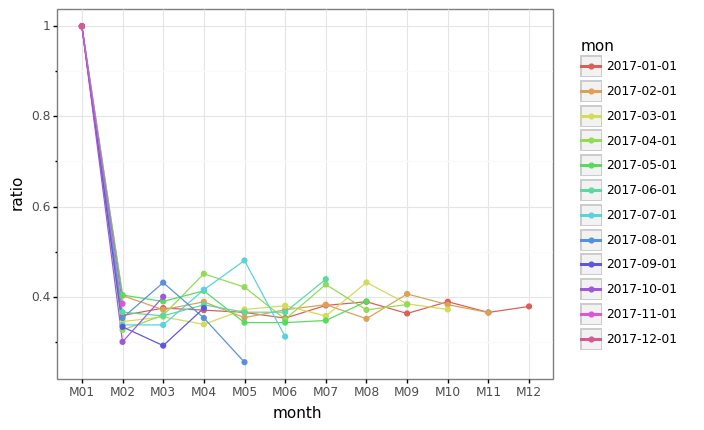

<ggplot: (8747152719525)>

In [121]:
(
    ggplot(res2.assign(mon = res2['mon'].astype(str)), aes('month', 'ratio', group = 'mon', color = 'mon')) +
    gg.geom_line() +
    gg.geom_point() +
    gg.theme_bw()
)

# RandomizedSearchCV

In [124]:
raw = skd.fetch_california_housing()
X = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = pd.DataFrame(raw['target'])
X.columns = [a.lower() for a in X.columns]
X.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [127]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 6.5 MB/s 


In [130]:
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline

In [129]:
x_tr, x_te, y_tr, y_te = train_test_split(X, y, train_size = .7)

In [146]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


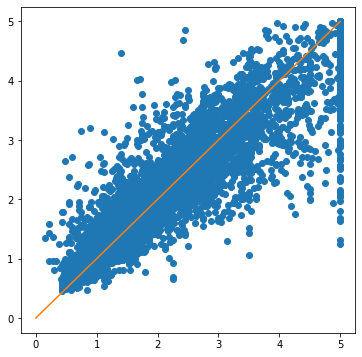

In [153]:
plt.figure(figsize = [6, 6])
plt.plot(y_te.values, pred_rf, 'o')
plt.plot([0,5], [0,5])

In [154]:
fit_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [155]:
params = {'max_depth' : [3, 5, 10, 15],
          'max_features' : [3, 5, 10],
          'n_estimators' : [80, 100, 150 ,200]
          }

In [161]:
ran_cv = RandomizedSearchCV(fit_rf, param_distributions=params,
                            n_iter = 500, cv = 5, scoring = 'neg_mean_squared_error', verbose = 1)

In [162]:
ran_cv.fit(x_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 48 is smaller than n_iter=500. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   param_distributions={'max_depth': [3, 5, 10, 15],
                                        'max_features': [3, 5, 10],
                                        'n_estimators': [80, 100, 150, 200]},
                   scoring='neg_mean_squared_error', verbose=1)

In [164]:
ran_cv.best_params_

{'max_depth': 15, 'max_features': 3, 'n_estimators': 100}

In [167]:
fit_best = RandomForestRegressor(
    max_depth = 15, max_features = 3, n_estimators = 100
).fit(x_tr, y_tr)
pred_best = fit_best.predict(x_te)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [170]:
mean_squared_error(y_te, pred_rf)**0.5, mean_squared_error(y_te, pred_best)**0.5

(0.5083106465620829, 0.496789138175645)

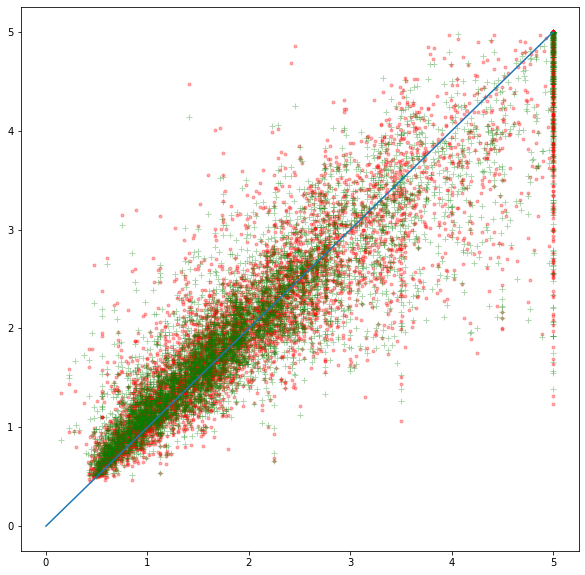

In [177]:
plt.figure(figsize = [10,10])
plt.plot(y_te.values, pred_rf, '.', color = 'red', alpha = .3)
plt.plot(y_te.values, pred_best, '+', color = 'green', alpha = .3)
plt.plot([0, 5], [0,5])